# Task 3 

In [22]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [21]:
def load_image(image_path):
    """ Load an image in grayscale. """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Failed to load image: {image_path}")
        return None
    return image

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.morphology import remove_small_objects

# Load an image in grayscale
def load_image(image_path):
    """ Load an image in grayscale. """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Failed to load image: {image_path}")
        return None
    return image

# Detect edges to find the approximate square Petri dish
def detect_edges(image):
    """ Detect edges to find the approximate square Petri dish. """
    # Apply Gaussian blur to smooth the image
    blurred_image = cv2.GaussianBlur(image, (51, 51), 0)

    # Compute horizontal and vertical gradients
    sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=5)

    # Calculate the gradient magnitude
    gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)

    # Threshold to identify strong edges
    _, edges = cv2.threshold(gradient_magnitude, 50, 255, cv2.THRESH_BINARY)
    edges = edges.astype(np.uint8)

    # Find contours to identify the Petri dish
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assume the largest square-like contour is the Petri dish
    max_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)

    # Ensure the crop is a square, adjust dimensions as needed
    side_length = max(w, h)
    center_x, center_y = x + w // 2, y + h // 2
    half_side = side_length // 2

    # Define new bounding box that is a square centered at the original bounding box
    new_x = max(center_x - half_side, 0)
    new_y = max(center_y - half_side, 0)
    new_w = min(side_length, image.shape[1] - new_x)
    new_h = min(side_length, image.shape[0] - new_y)

    return new_x, new_x + new_w, new_y, new_y + new_h

# Crop the image based on detected edges
def crop_image(image, edges):
    """ Crop the image based on detected edges and return the cropped region. """
    left, right, top, bottom = edges
    return image[top:bottom, left:right]

# Perform instance segmentation on the cropped image
def segment_instances(cropped_image):
    """ Perform instance segmentation on the cropped image. """
    # Apply median blur to reduce noise
    blurred_image = cv2.medianBlur(cropped_image, 5)

    # Apply binary thresholding
    _, binary = cv2.threshold(blurred_image, 145, 255, cv2.THRESH_BINARY_INV)

    # Morphological operations to clean up small noise
    kernel = np.ones((3, 3), np.uint8)
    morphed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Remove small objects
    labels, num_labels = cv2.connectedComponents(morphed)
    labels = remove_small_objects(labels, min_size=20)

    # Create an output image with unique colors for each instance
    segmented_image = np.zeros((labels.shape[0], labels.shape[1], 3), dtype=np.uint8)
    for label in range(1, num_labels):  # Skip the background
        segmented_image[labels == label] = np.random.randint(0, 255, size=3)

    return segmented_image

# Process images from the given directory for instance segmentation
def process_images_for_instance_segmentation(directory_path, max_images=None):
    """ Process images from the given directory for instance segmentation. """
    images_processed = 0
    for filename in os.listdir(directory_path):
        if filename.endswith(".png"):
            image_path = os.path.join(directory_path, filename)
            image = load_image(image_path)
            if image is None:
                continue

            edges = detect_edges(image)
            cropped = crop_image(image, edges)
            segmented = segment_instances(cropped)

            # Display the original, cropped, and segmented images side by side
            plt.figure(figsize=(15, 5))

            plt.subplot(1, 3, 1)
            plt.imshow(image, cmap='gray')
            plt.title(f"Original - {filename}")
            plt.axis('off')

            plt.subplot(1, 3, 2)
            plt.imshow(cropped, cmap='gray')
            plt.title(f"Cropped - {filename}")
            plt.axis('off')

            plt.subplot(1, 3, 3)
            plt.imshow(segmented)
            plt.title(f"Instance Segmented - {filename}")
            plt.axis('off')

            plt.show()

            images_processed += 1
            if max_images is not None and images_processed >= max_images:
                break

# Directly load and process a single image for debugging
def debug_single_image(image_path):
    """ Debug processing on a single image path. """
    image = load_image(image_path)
    if image is None:
        return

    edges = detect_edges(image)
    cropped = crop_image(image, edges)
    segmented = segment_instances(cropped)

    # Display results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cropped, cmap='gray')
    plt.title("Cropped Image")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(segmented)
    plt.title("Segmented Image")
    plt.axis('off')

    plt.show()

# Debug with a specific image
image_path = "D:/Holland_Year_2/Block_B/2024-25b-fai2-adsai-PetarPaskalev232725/datalab_tasks/task3/task_3_image_2.png"
debug_single_image(image_path)

# Define the paths and the number of images to process
y2b_24_path = "D:/Holland_Year_2/Block_B/2024-25b-fai2-adsai-PetarPaskalev232725/Y2B_24/images"

process_images_for_instance_segmentation(y2b_24_path, max_images=10)


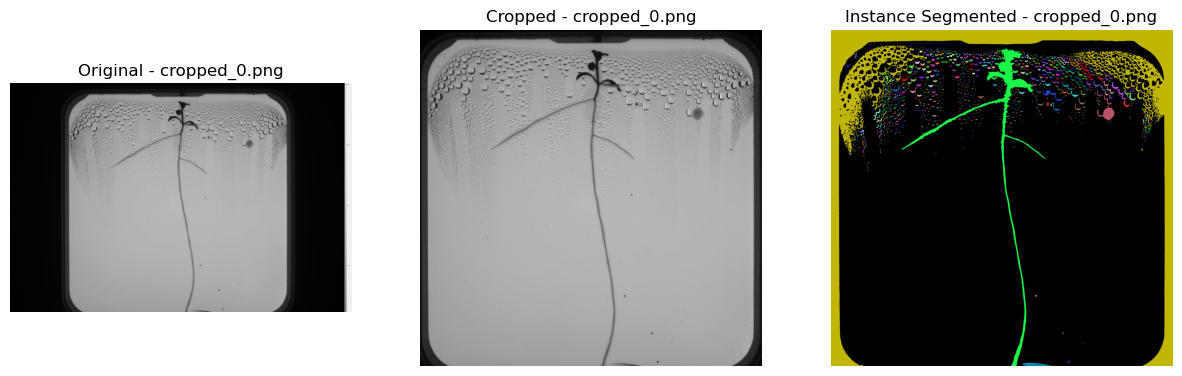

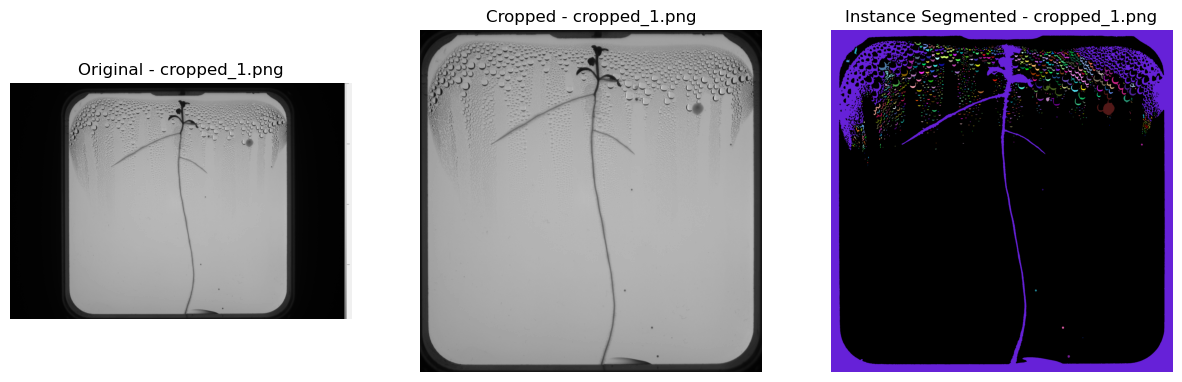

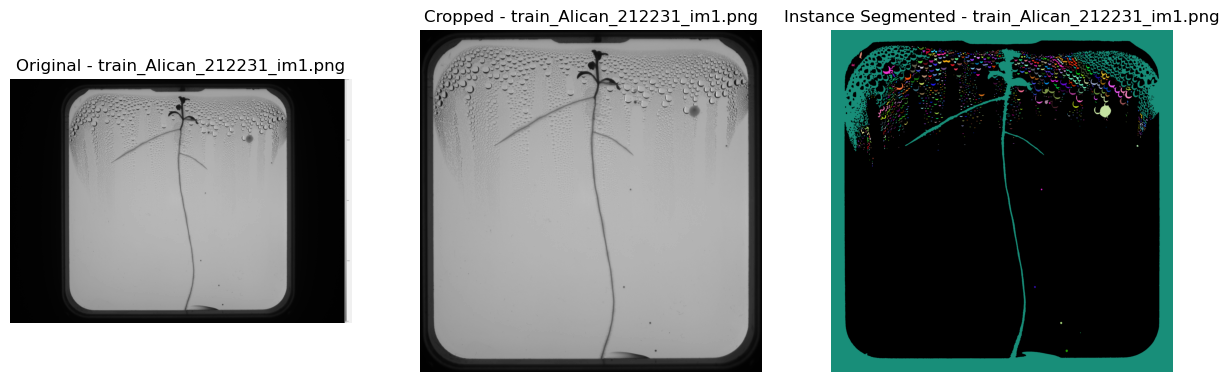

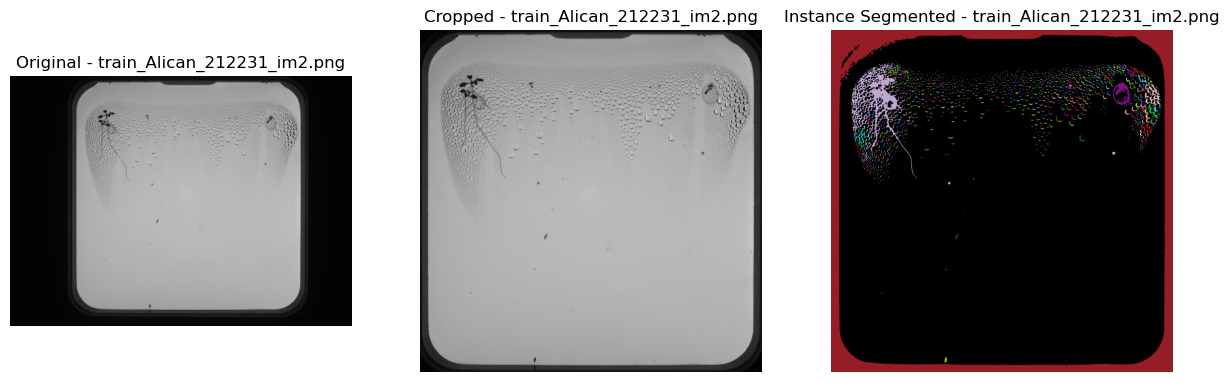

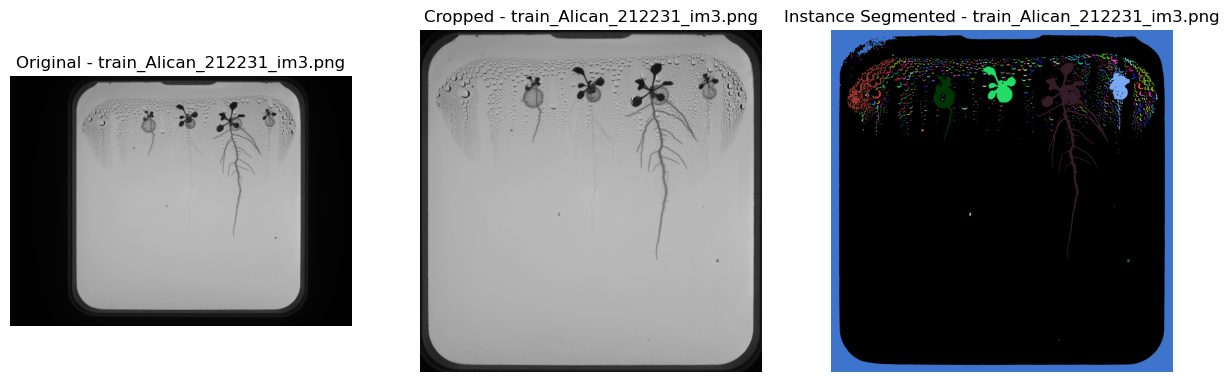

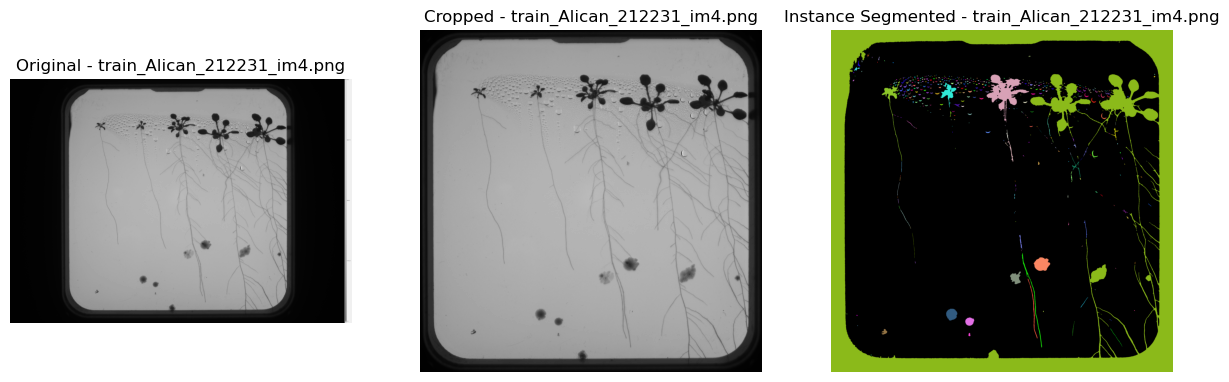

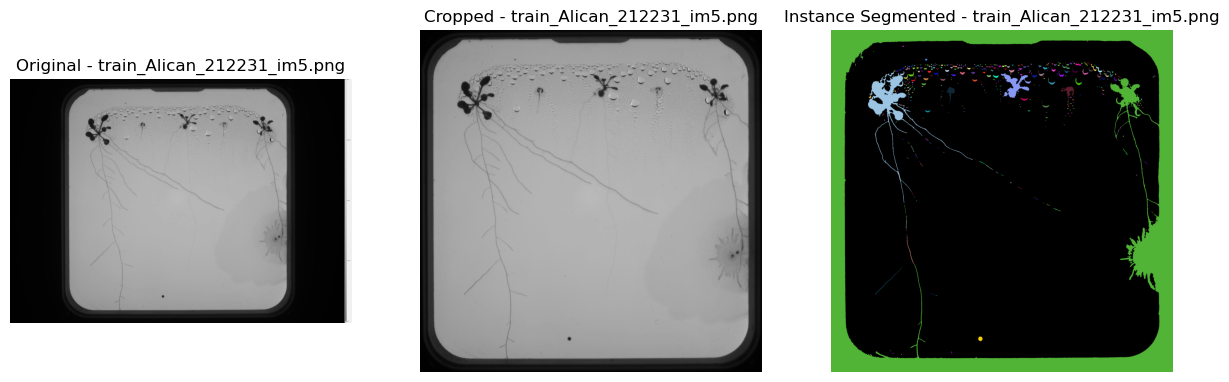

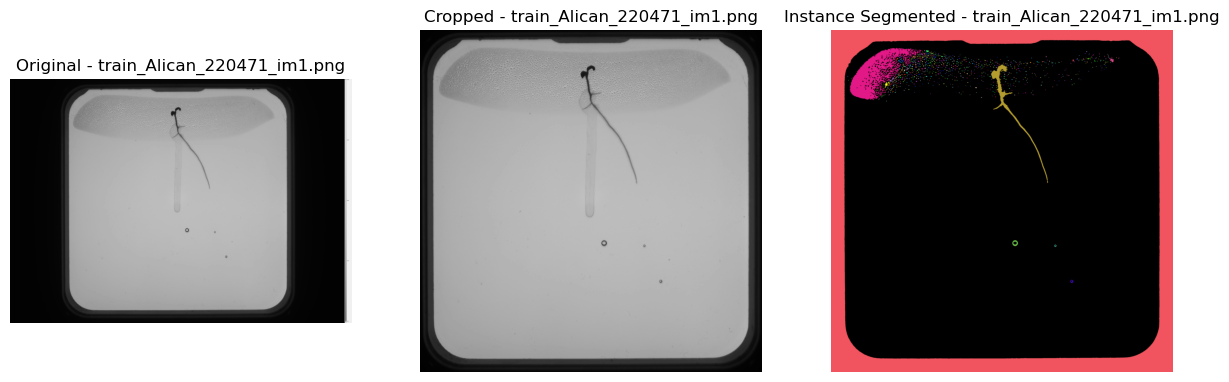

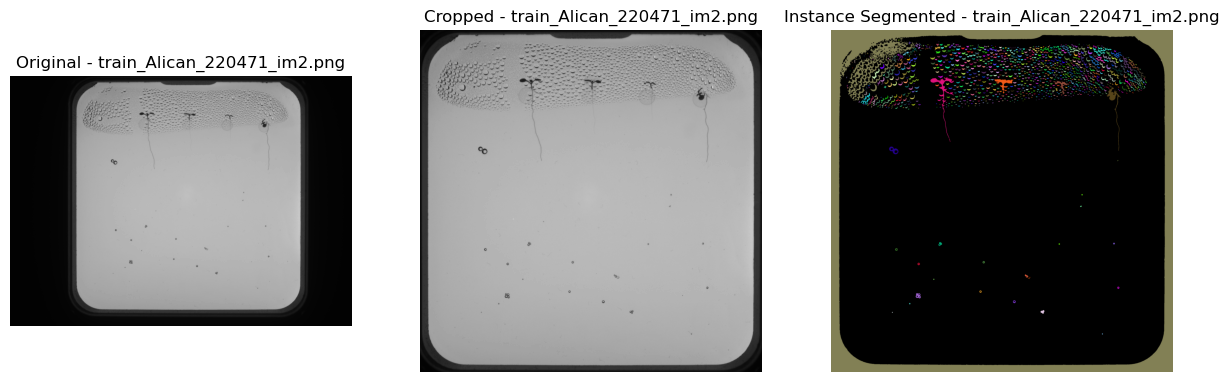

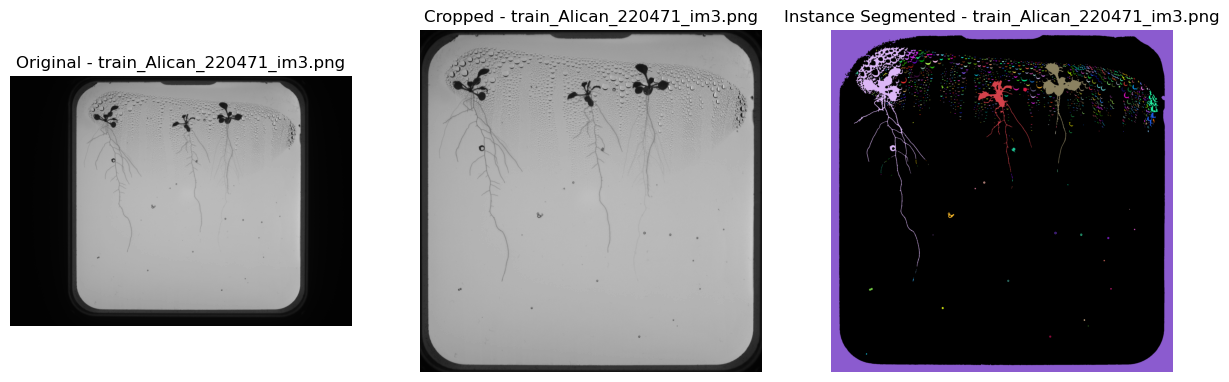

In [6]:
y2b_24_path = "D:/Holland_Year_2/Block_B/2024-25b-fai2-adsai-PetarPaskalev232725/Y2B_24/images"

process_images_for_instance_segmentation(y2b_24_path, max_images=10)


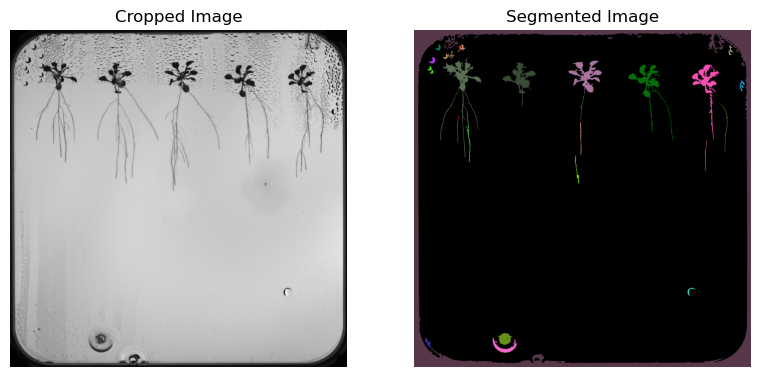

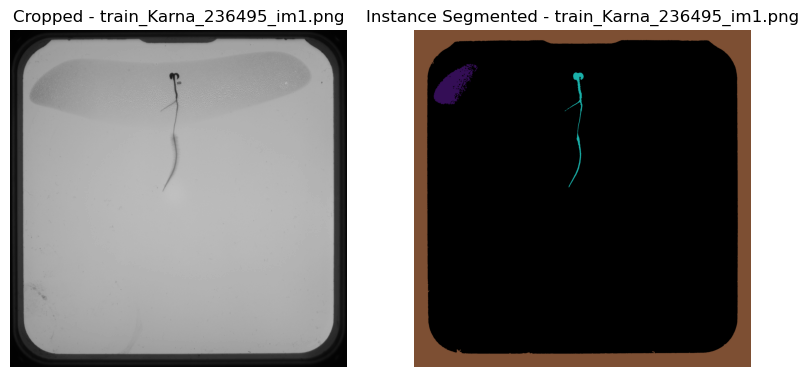

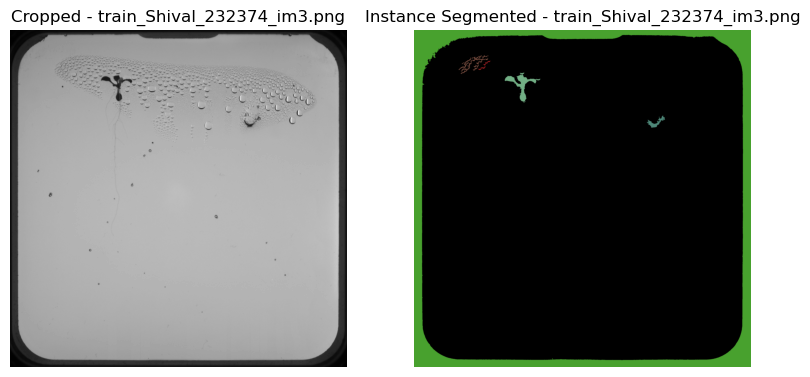

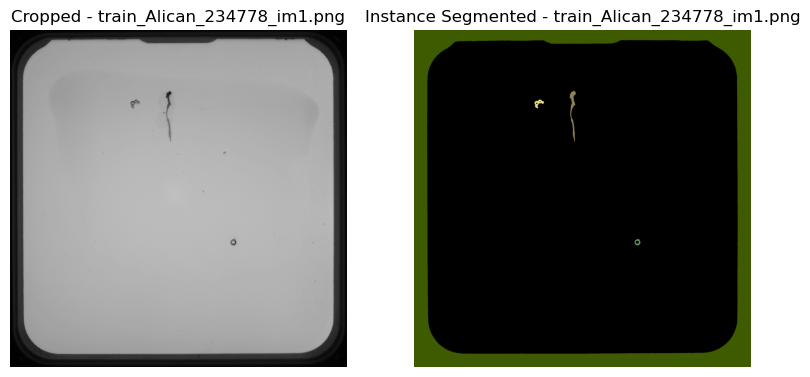

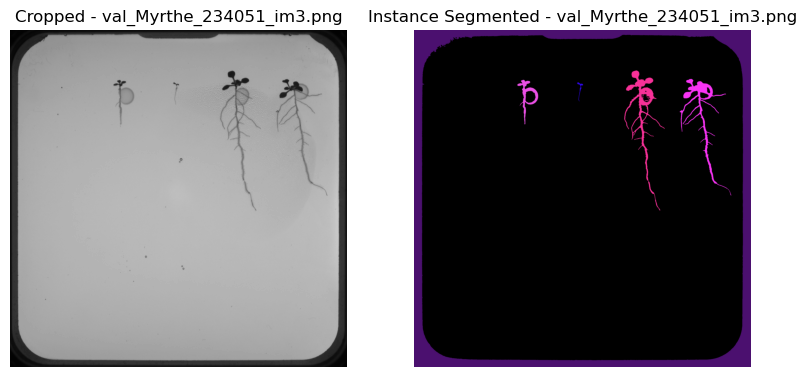

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.morphology import remove_small_objects, label

# Load an image in grayscale
def load_image(image_path):
    """ Load an image in grayscale. """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Failed to load image: {image_path}")
        return None
    return image

# Detect edges to find the approximate square Petri dish
def detect_edges(image):
    """ Detect edges to find the approximate square Petri dish. """
    # Apply Gaussian blur to smooth the image
    blurred_image = cv2.GaussianBlur(image, (51, 51), 0)

    # Compute horizontal and vertical gradients
    sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=5)

    # Calculate the gradient magnitude
    gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)

    # Threshold to identify strong edges
    _, edges = cv2.threshold(gradient_magnitude, 50, 255, cv2.THRESH_BINARY)
    edges = edges.astype(np.uint8)

    # Find contours to identify the Petri dish
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assume the largest square-like contour is the Petri dish
    max_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)

    # Ensure the crop is a square, adjust dimensions as needed
    side_length = max(w, h)
    center_x, center_y = x + w // 2, y + h // 2
    half_side = side_length // 2

    # Define new bounding box that is a square centered at the original bounding box
    new_x = max(center_x - half_side, 0)
    new_y = max(center_y - half_side, 0)
    new_w = min(side_length, image.shape[1] - new_x)
    new_h = min(side_length, image.shape[0] - new_y)

    return new_x, new_x + new_w, new_y, new_y + new_h

# Crop the image based on detected edges
def crop_image(image, edges):
    """ Crop the image based on detected edges and return the cropped region. """
    left, right, top, bottom = edges
    return image[top:bottom, left:right]

# Perform instance segmentation on the cropped image
def segment_instances(cropped_image):
    """ Perform instance segmentation on the cropped image. """
    # Apply median blur to reduce noise
    blurred_image = cv2.medianBlur(cropped_image, 5)

    # Apply binary thresholding
    _, binary = cv2.threshold(blurred_image, 145, 255, cv2.THRESH_BINARY_INV)

    # Morphological operations to clean up small noise
    kernel = np.ones((3, 3), np.uint8)
    morphed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Ensure the labeled image is integer type
    labeled_image = label(morphed > 0)

    # Remove small objects
    labeled_image = remove_small_objects(labeled_image, min_size=1000)

    # Create an output image with unique colors for each instance
    segmented_image = np.zeros((labeled_image.shape[0], labeled_image.shape[1], 3), dtype=np.uint8)
    for label_value in np.unique(labeled_image):
        if label_value == 0:  # Skip background
            continue
        segmented_image[labeled_image == label_value] = np.random.randint(0, 255, size=3)

    return segmented_image, morphed


# Process images from the given directory for instance segmentation
def process_images_for_instance_segmentation(directory_path, max_images=None):
    """ Process images from the given directory for instance segmentation. """
    images_processed = 0
    filenames = [f for f in os.listdir(directory_path) if f.endswith(".png")]
    np.random.shuffle(filenames)  # Randomize file order
    for filename in filenames:
        if images_processed >= max_images:
            break

        image_path = os.path.join(directory_path, filename)
        image = load_image(image_path)
        if image is None:
            continue

        edges = detect_edges(image)
        cropped = crop_image(image, edges)
        segmented, morphed = segment_instances(cropped)

        # Draw bounding boxes
       
        # Display the original, cropped, segmented, and boxed images side by side
        plt.figure(figsize=(20, 5))

       

        plt.subplot(1, 4, 2)
        plt.imshow(cropped, cmap='gray')
        plt.title(f"Cropped - {filename}")
        plt.axis('off')

        plt.subplot(1, 4, 3)
        plt.imshow(segmented)
        plt.title(f"Instance Segmented - {filename}")
        plt.axis('off')

        plt.show()

        images_processed += 1

# Directly load and process a single image for debugging
def debug_single_image(image_path):
    """ Debug processing on a single image path. """
    image = load_image(image_path)
    if image is None:
        return

    edges = detect_edges(image)
    cropped = crop_image(image, edges)
    segmented, morphed = segment_instances(cropped)

    # Display results
    plt.figure(figsize=(20, 5))

   

    plt.subplot(1, 4, 2)
    plt.imshow(cropped, cmap='gray')
    plt.title("Cropped Image")
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(segmented)
    plt.title("Segmented Image")
    plt.axis('off')


# Debug with a specific image
image_path = "D:/Holland_Year_2/Block_B/2024-25b-fai2-adsai-PetarPaskalev232725/datalab_tasks/task3/task_3_image_2.png"
debug_single_image(image_path)

# Define the paths and the number of images to process
y2b_24_path = "D:/Holland_Year_2/Block_B/2024-25b-fai2-adsai-PetarPaskalev232725/Y2B_24/images"

process_images_for_instance_segmentation(y2b_24_path, max_images=4)


In [46]:
def adjust_edge_threshold(image, initial_threshold=30, increment=10, max_threshold=100):
    """Adjust edge threshold to find optimal edges."""

    for threshold in range(initial_threshold, max_threshold + increment, increment):
        # Call detect_edges with the current threshold
        try:
            new_x, new_x_end, new_y, new_y_end = detect_edges(image, edge_threshold=threshold)
            cropped_image = crop_image(image, (new_x, new_x_end, new_y, new_y_end))
            
            plt.figure(figsize=(10, 5))
            plt.imshow(cropped_image, cmap='gray')
            plt.title(f"Edge Threshold: {threshold}")
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"Error with threshold {threshold}: {e}")
            continue

    print("Edge threshold adjustment complete. Choose an optimal value.")


In [32]:
def adjust_binary_threshold(image, initial_threshold=120, increment=10, max_threshold=200):
    """Adjust binary threshold to find optimal segmentation."""
    blurred_image = cv2.medianBlur(image, 5)
    for threshold in range(initial_threshold, max_threshold + increment, increment):
        _, binary = cv2.threshold(blurred_image, threshold, 255, cv2.THRESH_BINARY_INV)
        plt.imshow(binary, cmap='gray')
        plt.title(f"Binary Threshold: {threshold}")
        plt.axis('off')
        plt.show()
    print("Tested binary thresholds. Choose an optimal value.")


In [33]:
def remove_background_and_artifacts(labeled_image):
    """Remove the largest component (background) and small artifacts."""
    unique, counts = np.unique(labeled_image, return_counts=True)
    largest_label = unique[np.argmax(counts)]
    labeled_image[labeled_image == largest_label] = 0  # Remove background

    # Optionally, remove small components touching borders
    border_labels = np.unique(
        np.concatenate([labeled_image[:, 0], labeled_image[:, -1], labeled_image[0, :], labeled_image[-1, :]])
    )
    for border_label in border_labels:
        labeled_image[labeled_image == border_label] = 0

    return labeled_image


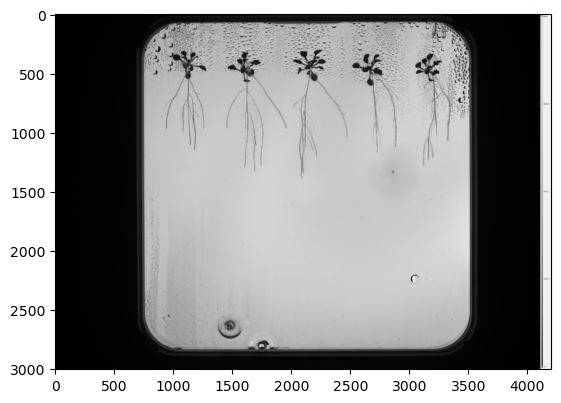

In [40]:
image_path = "D:/Holland_Year_2\Block_B/2024-25b-fai2-adsai-PetarPaskalev232725/datalab_tasks/task3/task_3_image_2.png"
image = cv2.imread(image_path)
type(image)
plt.imshow(image)

In [42]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
adjust_binary_threshold

In [50]:
remove_background_and_artifacts(image)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [61]:
def debug_single_image(image_path, detect_edges, crop_image, binary_threshold=160, min_object_size=2000):
    """ Debug processing on a single image path with additional Otsu's thresholding and contour detection. """
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Failed to load image: {image_path}")
        return

    # Detect edges and crop the image using provided functions
    edges = detect_edges(image)
    cropped_image = crop_image(image, edges)

    # Perform instance segmentation on the cropped image
    def segment_instances(image, binary_threshold, min_object_size):
        # Apply median blur to reduce noise
        blurred_image = cv2.medianBlur(image, 5)

        # Apply Otsu's thresholding
        _, binary = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Morphological operations to clean up small noise
        kernel = np.ones((5, 5), np.uint8)
        morphed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=3)

        # Remove small holes inside objects
        morphed = remove_small_holes(morphed > 0, area_threshold=200).astype(np.uint8)

        # Ensure the labeled image is integer type
        labeled_image = label(morphed > 0)

        # Remove small objects
        labeled_image = remove_small_objects(labeled_image, min_size=min_object_size)

        # Remove the largest component (background)
        unique, counts = np.unique(labeled_image, return_counts=True)
        background_label = unique[np.argmax(counts)]
        labeled_image[labeled_image == background_label] = 0

        # Create an output image with unique colors for each instance
        segmented_image = np.zeros((labeled_image.shape[0], labeled_image.shape[1], 3), dtype=np.uint8)
        for label_value in np.unique(labeled_image):
            if label_value == 0:  # Skip background
                continue
            segmented_image[labeled_image == label_value] = np.random.randint(0, 255, size=3)

        return segmented_image, morphed

    segmented, morphed = segment_instances(cropped_image, binary_threshold, min_object_size)

    # Find and draw contours
    contours, _ = cv2.findContours((morphed * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_image = np.zeros_like(segmented)
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

    # Display results
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(cropped_image, cmap='gray')
    plt.title("Cropped Image")
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(morphed, cmap='gray')
    plt.title("Morphed Image")
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(segmented)
    plt.title("Segmented Image")
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(contour_image)
    plt.title("Contour Image")
    plt.axis('off')

    plt.show()


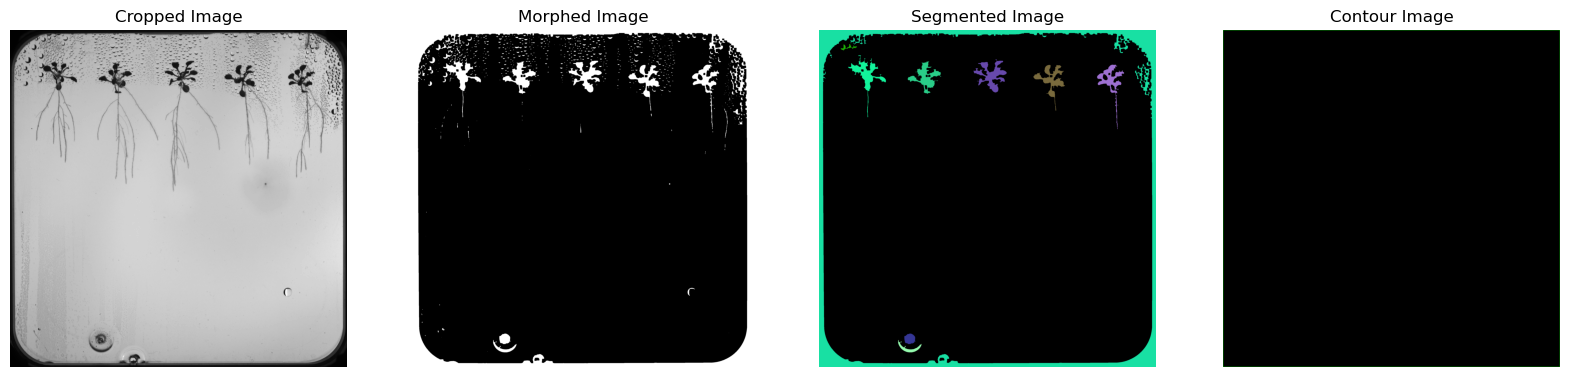

In [64]:
# Provide the path to the image
image_path = "D:/Holland_Year_2/Block_B/2024-25b-fai2-adsai-PetarPaskalev232725/datalab_tasks/task3/task_3_image_2.png"

# Call the debug_single_image function
debug_single_image(
    image_path=image_path,
    detect_edges=detect_edges,  # Ensure detect_edges function is imported or defined
    crop_image=crop_image,      # Ensure crop_image function is imported or defined
    binary_threshold=160,       # Adjust binary threshold as needed
    min_object_size=2000        # Adjust minimum object size as needed
)
